# **1. Selección de dataset**

Para la presente práctica, se decide   elegir el dataset "German Credit Risk" que se encuentra en el siguiente enlace. https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk?select=german_credit_data.csv  y que contiene 11 columnas con 5  variables numéricas y  6 variables categóricas. 


El dataset presenta datos  que permiten identificar las diferentes variables que afectan a un cliente que solicita un credito nte una entidad financiera. 

### **Descripción del dataset** 

El dataset contiene los siguientes campos: 

*  Age : Edad del solicitante.
*  Sex : Sexo del solicitante.
*  Job :  Ocupacion y cantidad de trabajos.
*  Housing: Tipo de alojamiento del solicitante.
*  Saving accounts: Tipo de cuenta  de ahorro del solicitante
*  Checking account: Tipo de cuenta de cheques del solicitante.
*  Credit amount: Monto del credito.
*  Duration: Duracion.
*  Purpose: Proposito del credito. 
*  Risk: Presenta el riesgo del solicitante.



### **Problema a resolver** 

Teniendo en cuenta el dataset y la información que contiene, se propone como problema a resolver, hacer una revisión detallada de los clientes que solicitan un crédito, con el fin de hacer un análisis descriptivo inicialmente, y posteriormente una regresión logística que permita clasificar los créditos que no se pagarán y lo que se pagarán, según su clasificación de riesgo.

### **Carga del dataset**

In [ ]:
# Importar librerias que se van a usar durante el proyecto. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px

In [ ]:
#Carga del dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSbj-qyQj2bBOBCLvFbiSTYEjP_y0_EmqdSrfl-9cBVO2w40729laXOp4sV-rb9FN_v3JLRgrzEEewL/pub?output=csv"
german_credit_data = pd.read_csv(url,sep=',')
german_credit_data.head(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good


*  **Tipos de datos**



In [ ]:
#Resumen del dataframe y tipos de datos que contiene. 
#En este caso vemos 4 variables categoricas (object) y 6 variables numericas (int64).
german_credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


### **2. Integración y selección**

El dataset no requiere de la integracion de nuevas columnas o combinación con otros datasets.

### **3. limpieza de datos**

* **Para iniciar la limpieza primero se revisan los valores nulos.**



In [ ]:
# Verificación de campos nulos en cada columna.
# Se encuentra que Saving accounts  y  Checking account existen valores nulos.
german_credit_data.isnull().any()

Unnamed: 0          False
Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [ ]:
# Procedemos a verificar la cantidad de valores nulos por columnas.
german_credit_data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

* **Reemplazo de valores nulos**

Existen valores nulos para reemplazar.



In [ ]:
#  las columas Saving accounts y Chekings accounts reciben tratamiento, eliminando los valores nulos 
# reemplazando dichos valores por Little.
german_credit_data['Saving accounts'].replace(np.nan,'little',inplace=True)
german_credit_data['Checking account'].replace(np.nan,'little',inplace=True)
german_credit_data.sample(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
626,626,41,male,2,own,little,rich,2116,6,furniture/equipment,good
452,452,34,male,2,own,little,little,2759,12,furniture/equipment,good
907,907,27,male,2,own,little,moderate,3711,36,education,good


*   **Elementos vacios**

In [ ]:
# Se procede a revisar si existen elementos vacios dentro del dataframe.
# Dando como resultado que no existe ninguno. 
german_credit_data.empty

False

*   **Deteccion de valores extremos**






Se identifican valores extremos de las variables numericas.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


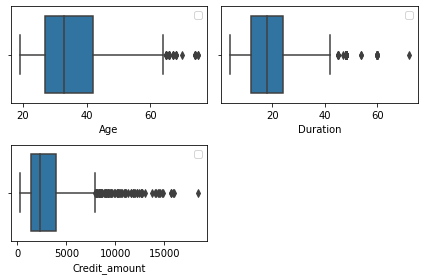

In [ ]:
# La variable Job no se reviso debido a que tenía los datos clasificados en 4 grupos y el gráfico 
#no iba a mostrar valores extemos representantivos.
# Mientras que las otras columnas numericas tenian valores que podrian variar dependiendo del candidato.
german_credit_data= german_credit_data.rename(columns={'Credit amount':'Credit_amount'})
german_credit_data.columns
plt.subplot(2,2,1)
sn.boxplot(german_credit_data.Age)
plt.legend()
plt.subplot(2,2,2)
sn.boxplot(german_credit_data.Duration)
plt.legend()
plt.subplot(2,2,3)
sn.boxplot(german_credit_data.Credit_amount)
plt.legend()
plt.tight_layout()
plt.show()
#Al revisar los valores que se encuentran dentro de las solicitudes de crédito, 
#vemos que son valores que se pueden dar sin problema, debido a que la edad de los solicitande puede ser variada, 
#y la duración y el monto del crédito también varia dependiendo de las necesidades de las personas.Por lo cual, si se hiciera 
#un tratamiento para limitar los valores extremos, se perdería información importante. 

* **Exportar los datos en un fichero csv**

Con las modificaciones hechas al dataset (cambiar los valores nulos), se genera un nuevo dataset para continuar con el trabajo.

In [ ]:
german_credit_data.to_csv('german_credit.csv')

### **4. Análisis de los datos.**

Para hacer un analisis de estos datos, iniciamos con un analisis exploratorio, por medio de un analisis descriptivo que nos hacer una revision de los datos de manera rapida y ver que variables aparte de las 
numericas mencionadas anteriomente pueden ser importantes.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


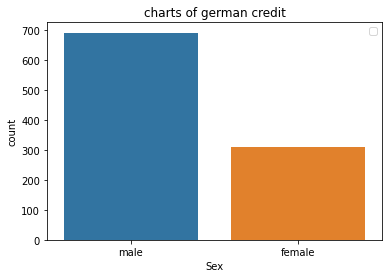

In [ ]:
# Vemos que de los 1000 registros,  700 son de Hombres, mientras 300 son de mujeres. 
plt.title('charts of german credit')
sn.countplot(german_credit_data.Sex)
plt.legend()

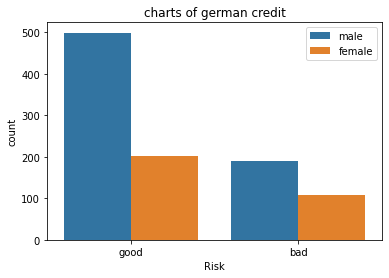

In [ ]:
#Se muestra un patron similar entre el riesgo de los hombres y las mujeres en cuanto al riesgo.
plt.title('charts of german credit')
sn.countplot(data=german_credit_data, x='Risk',hue='Sex')
plt.legend()

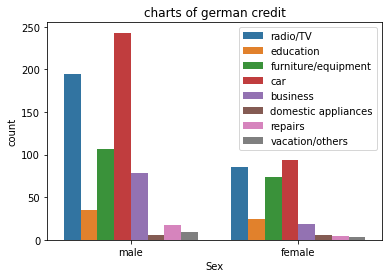

In [ ]:
plt.title('charts of german credit')
sn.countplot(data=german_credit_data, x='Sex',hue='Purpose')
plt.legend()
#Al ser un analisis descriptivo de los propositos de solicitud de credito, podemos ver lo siguiente:
#En ambos sexos la mayoria de solicitudes siguien un patron similar.

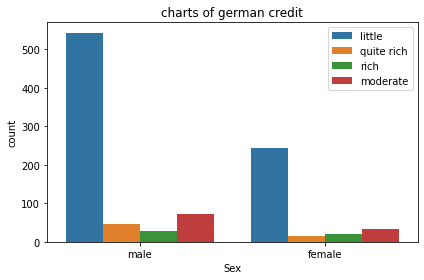

In [ ]:
plt.title('charts of german credit')
sn.countplot(data=german_credit_data, x='Sex',hue='Saving accounts')
plt.legend()
plt.tight_layout()
plt.show()

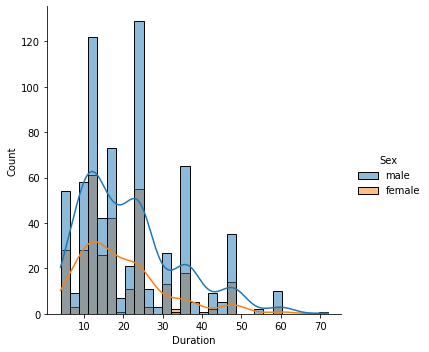

In [ ]:
sn.displot(data=german_credit_data,x='Duration',hue='Sex',kde=True)
# Mostando que los creditos de los hombres tienen una mayor duracion que los creditos de las mujeres. 

In [ ]:
fig = px.histogram(german_credit_data,x='Credit_amount',color='Saving accounts',template='plotly_dark',marginal='box',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(barmode='group')
#las cuentas pequeñas son quienes solicitan mas creditos.

### **Normalidad**

**Analisis de normalidad**,Se elegiran las variables "Age", "Credit_amount" y "Duration" para el analisis de normalidad, debido a que las demas son variables categoricas, que al ser convertidas en variables continuas, presentarian normalidad, ya que las clasificaciones que se les daria serian muy pocas.

**Analisis de normalidad con Q-Q plot**

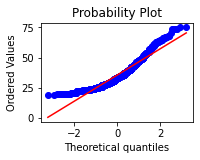

In [ ]:
# Prueba Q-Q plot para probar la normalidad de los datos. 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
plt.subplot(2,2,1)
stats.probplot(german_credit_data.Age, dist = "norm", plot = pylab)
plt.show()

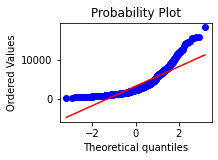

In [ ]:
plt.subplot(2,2,2)
stats.probplot(german_credit_data.Credit_amount, dist = "norm", plot = pylab)
plt.show()

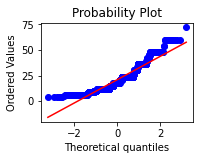

In [ ]:
plt.subplot(2,2,3)
stats.probplot(german_credit_data.Duration, dist = "norm", plot = pylab)
plt.show()

*  Se puede observar en el grafico, que los datos de las variables numericas Age, Credit_amount y duracion, no siguen un distribucion 
normal, confirmando los valores extremos que vimos en el inicio.
* Esto se debe a que en este grupo de solicitantes, tienen  diferentes
edades, montos de credito y duracion de estos, algo normal y que podria 
suceder con otros grupo de solicitantes. 



**Analisis de normalidad con Shapiro-Wilks**

Utilizamos otros metodo como es Shapiro-Wilks para revisar si la distribucion de los datos era normal, y encontramos que al igual 
que el anterior metodo, nos muestra anormalidad en los datos. 


In [ ]:
from scipy.stats import shapiro
sh,p = shapiro(german_credit_data.Age)
print(sh,p)
if p> 0.05:
  print('Age,Presenta una distribucion gausiana')
else:
  print('Age,No presenta una distribucion gausiana')

0.9174707531929016 6.381270673909361e-23
Age,No presenta una distribucion gausiana


In [ ]:
from scipy.stats import shapiro
sh,p = shapiro(german_credit_data.Credit_amount)
print(sh,p)
if p> 0.05:
  print('Credit_amount, Presenta una distribucion gausiana')
else:
  print('Credit_amount, No presenta una distribucion gausiana')

0.7933971881866455 8.609912964372653e-34
Credit_amount, No presenta una distribucion gausiana


In [ ]:
from scipy.stats import shapiro
sh,p = shapiro(german_credit_data.Duration)
print(sh,p)
if p> 0.05:
  print('Duration,Presenta una distribucion Gausiana')
else:
  print('Duration, No presenta una distribucion Gausiana')

0.8997892737388611 4.908141189598946e-25
Duration, No presenta una distribucion Gausiana


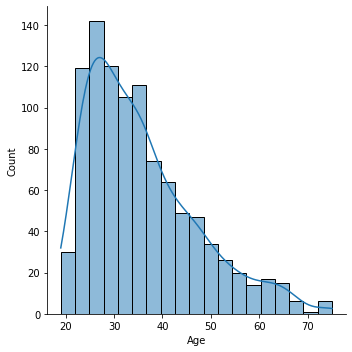

In [ ]:
sn.displot(german_credit_data['Age'], kde=True)

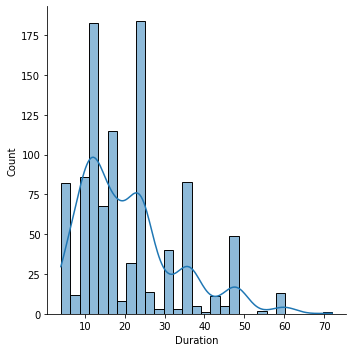

In [ ]:
sn.displot(german_credit_data['Duration'], kde=True)

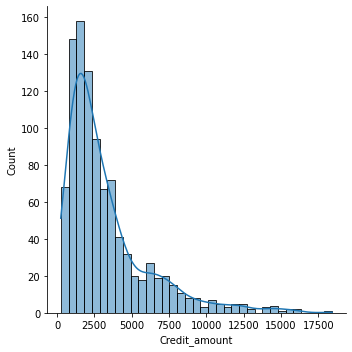

In [ ]:
sn.displot(german_credit_data['Credit_amount'], kde=True)

**Prueba de homogeneidad**

In [ ]:
from scipy.stats import fligner
stat, p = fligner(german_credit_data['Age'], german_credit_data['Duration'])
print(stat, p)
alpha = 0.05
if p > alpha:
    print('La varianza es similar (no se rechaza)')
else:
    print('La varianza no es similar (rechaza)')

0.5462373798007437 0.45985918735345666
La varianza es similar (no se rechaza)


In [ ]:
from scipy.stats import fligner
stat, p = fligner(german_credit_data['Credit_amount'], german_credit_data['Duration'])
print(stat, p)
alpha = 0.05
if p > alpha:
    print('La varianza es similar (no se rechaza)')
else:
    print('La varianza no es similar (rechaza)')

1214.3359825467426 4.674180992457999e-266
La varianza no es similar (rechaza)


In [ ]:
from scipy.stats import fligner
stat, p = fligner(german_credit_data['Age'], german_credit_data['Credit_amount'])
print(stat, p)
alpha = 0.05
if p > alpha:
    print('La varianza es similar (no se rechaza)')
else:
    print('La varianza no es similar (rechaza)')

1212.1854677522851 1.3710968806473167e-265
La varianza no es similar (rechaza)


Vemos que existe una similitud en la varianza entre las variables de edad y duracion, mientras que en las variables de credit_amount y duration no existe una similitud, lo mismo que entre Age y Credit_amount.

**Contraste De Hipotesis**

In [ ]:
from scipy.stats import levene
w, p = levene(german_credit_data['Age'], german_credit_data['Credit_amount'])
print(w, p)
alpha = 0.05
if p > alpha:
    print('Varianzas Iguales (no rechaza H0)')
else:
    print('Varianzas Distintas (rechaza H0)')

658.7436387076679 8.381796636693905e-126
Varianzas Distintas (rechaza H0)


In [ ]:
from scipy.stats import levene
w, p = levene(german_credit_data['Age'], german_credit_data['Duration'])
print(w, p)
alpha = 0.05
if p > alpha:
    print('Varianzas Iguales (no rechaza H0)')
else:
    print('Varianzas Distintas (rechaza H0)')

1.3410908730362407 0.24698008962582912
Varianzas Iguales (no rechaza H0)


In [ ]:
from scipy.stats import levene
w, p = levene(german_credit_data['Credit_amount'], german_credit_data['Duration'])
print(w, p)
alpha = 0.05
if p > alpha:
    print('Varianzas Iguales (no rechaza H0)')
else:
    print('Varianzas Distintas (rechaza H0)')

658.451936063844 9.355098254244076e-126
Varianzas Distintas (rechaza H0)


**Matriz de correlacion**

In [ ]:
# No existe una correlacion entre sexo Risk good.
#Lo mismo ocurre con la edad, la edad no tendria que estar correlacionada con una probabilidad de apgo o impago. 
# Se inicia el cambio de la variable Risk a binario dejando el riesgo "good" como cero y el "bad" como 1
r = {"good":0, "bad": 1}
german_credit_data['Risk'] = german_credit_data['Risk'].map(r)

In [ ]:
# convertir las variable categoricas en variables numericas en todo el dataframe
german_credit_data = pd.get_dummies(german_credit_data)

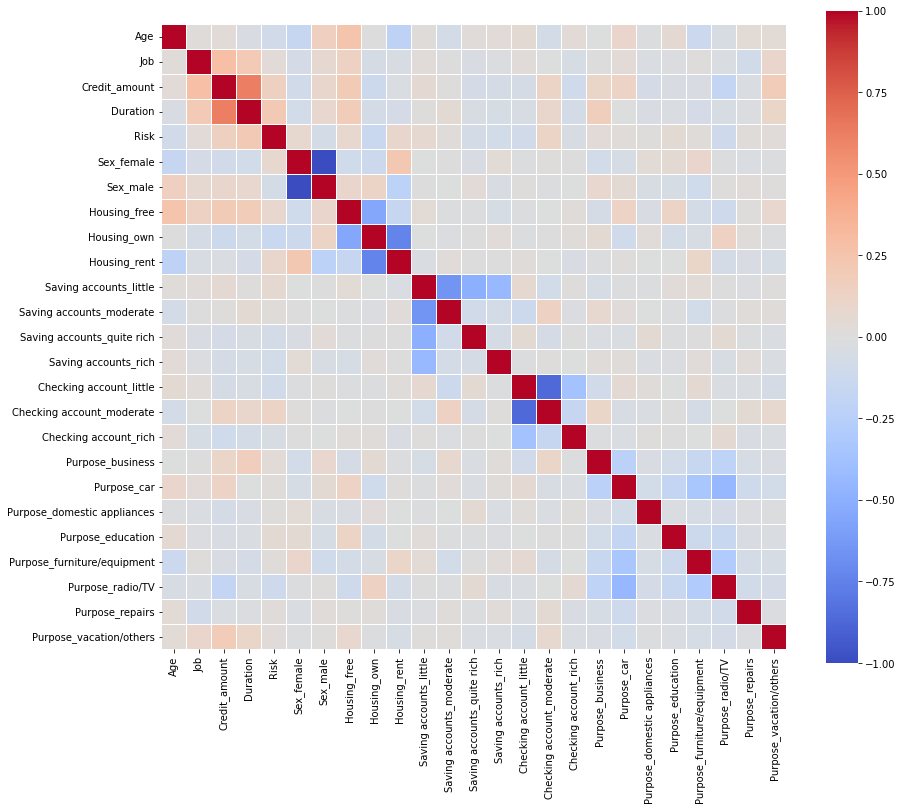

In [ ]:
# Con las variables convertidas, hacemos una matriz de correlacion 
german_credit_data = german_credit_data.drop(columns=["Unnamed: 0"])
plt.figure(figsize=(14,12))
sn.heatmap(german_credit_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', cmap='coolwarm')
plt.show()

Como se puede ver en la matriz de correlacion, Credit_amount, Duration y son las variables que mas se relacionan y con esto podemos crear los predictores para hacer la regresion. 

**Logistic Regression con Credit_amount**

In [ ]:
# dividir el dataset en X & Y
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X = german_credit_data.drop(['Risk', 'Credit_amount'], axis=1).values
y = german_credit_data['Risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
#Aplicar LogisticRegressio. 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
print(accuracy_score(y_pred_log, y_test))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

0.7
[[127  14]
 [ 46  13]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       141
           1       0.48      0.22      0.30        59

    accuracy                           0.70       200
   macro avg       0.61      0.56      0.56       200
weighted avg       0.66      0.70      0.66       200



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**Logistic Regression con Duration**

In [ ]:
# dividir el dataset en X & Y
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X = german_credit_data.drop(['Risk', 'Duration'], axis=1).values
y = german_credit_data['Risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
#Aplicar LogisticRegressio. 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
print(accuracy_score(y_pred_log, y_test))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

0.655
[[125  16]
 [ 53   6]]
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       141
           1       0.27      0.10      0.15        59

    accuracy                           0.66       200
   macro avg       0.49      0.49      0.47       200
weighted avg       0.58      0.66      0.60       200



### **Conclusiones**

Vemos como conclusion que usando una regresion logistica sobre las variables Risk(convertida a binario), y Credit_amount podemos lograr 
una precisión de 0.73, un recall  de 0.90 y  y una puntuación f1-score de 0.8 para clasificar el riesgo "good" o "0".Sin embargo, tiene un desempeño más bajo  y al parecer poco efectivo para en clasificar el riesgo "bad" o 1, con una precisión de 0.48, un recall de 0.22 y una puntuación f1-score de 0.30.


Si hacemos lo mismo con la variable "Duration", vemos que la regresion se vuelve menos efectiva ya que en este caso, se puede ver que el modelo tiene una precisión de 0.70 en clasificar el riesgo "good" o  0, un recall de 0.89 y una puntuación f1-score de 0.78., y para el segundo clasificador se baja bastante su precision para el riesgo bad o 1, con una precisión de 0.27, un recall de 0.10 y una puntuación f1-score de 0.15. 


Esto significa que el modelo de logistic regresion es bueno para predecir la clase Good o 0, pero tiene dificultades para predecir la clase bad o 1.


Info importante
* La precisión indica la proporción de predicciones correctas entre las predicciones totales. 
* El recall indica la proporción de ejemplos de una clase que fueron correctamente clasificados entre todos los ejemplos de esa clase. 
* La puntuación f1-score es una medida combinada de precisión y recall.

**Contribuciones**
*   Investigacion previa : JC Y SM
*   Redaccion de las respuestas:  JC Y SM
*   Desarollo del codigo: JC Y SM
*   Participacion en el video: JC Y SM

